In [ ]:
uploaded = files.upload()

# New Section

In [ ]:
# Standard imports
import cv2
import numpy as np
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from PIL import Image
import os
import random
from google.colab import files

In [ ]:
# Read image
# image = cv2.imread('081937.png')
image = cv2.imread('080321.png')

#convert to grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

In [ ]:
from zipfile import ZipFile
zipObj = ZipFile('files.zip', 'w')


#Get images names
import os
images_names = image

# loop over the images

for im in images_names:
  image = cv2.imread(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #equalizing the image 
  darker = cv2.equalizeHist(gray)
  #threshold
  ret,thresh = cv2.threshold(darker,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  #inversing the bits of the image 
  newimg = cv2.bitwise_not(thresh)

  # opening
  kernel = np.ones((5,5),np.uint8)
  opened = cv2.morphologyEx(newimg, cv2.MORPH_OPEN, kernel)

  #find contours of white objects
  contours, hierarchy = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  
  #filling the "holes" of the white objects (red blood cells). 
  #This is needed for proper segmentation with the watershed algorithm
  for cnt in contours:
    cv2.drawContours(opened,[cnt],0,255,-1)
  # compute the exact Euclidean distance from every binary
  # pixel to the nearest zero pixel, then find peaks in this
  # distance map
  D = ndimage.distance_transform_edt(opened)
  localMax = peak_local_max(D, indices=False, min_distance=15,
	  labels=opened)
  # perform a connected component analysis on the local peaks,
  # using 8-connectivity, then appy the Watershed algorithm
  
  markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
  labels = watershed(-D, markers, mask=opened)
  print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
  

# loop over the unique labels returned by the Watershed algorithm
  for i,label in enumerate(np.unique(labels)):
# if the label is zero, we are examining the 'background' so simply ignore it
	  if label == 0:
		  continue
# otherwise, allocate memory for the label region and draw it on the mask
	  mask = np.zeros(gray.shape, dtype="uint8")
	  mask[labels == label] = 255
 
# detect contours in the mask and grab the largest one
	  cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		  cv2.CHAIN_APPROX_SIMPLE)[-2]
	  c = max(cnts, key=cv2.contourArea)
	  x,y,w,h = cv2.boundingRect(c)
	  new_img=image[y:(y+h),x:(x+w)]
	  cv2.imwrite(f"im{i}.jpeg",new_img)
	  myimg = cv2.imread(f'img{i}.jpeg')
	  cv2.imwrite(f"im{i}.jpeg",myimg)
	  zipObj.write(f'im{i}.jpeg')
files.download('files.zip')





In [ ]:
#Unzip
# !unzip images.zip -d images_folder

#Get images names
import os
images_names = os.listdir("/content/images_folder")

# loop over the images

for im in images_names:
  print(im)
  #read image
  image = cv2.imread("images_folder/"+im, cv2.IMREAD_GRAYSCALE)
  plt.imshow(image)
  plt.show()

  #convert to grayscale 
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray)
  plt.show()
  

In [ ]:
  image = cv2.imread("images_folder/"+images_names[0], cv2.)
  plt.imshow(image)
  plt.show
  Image.fromarray(image)

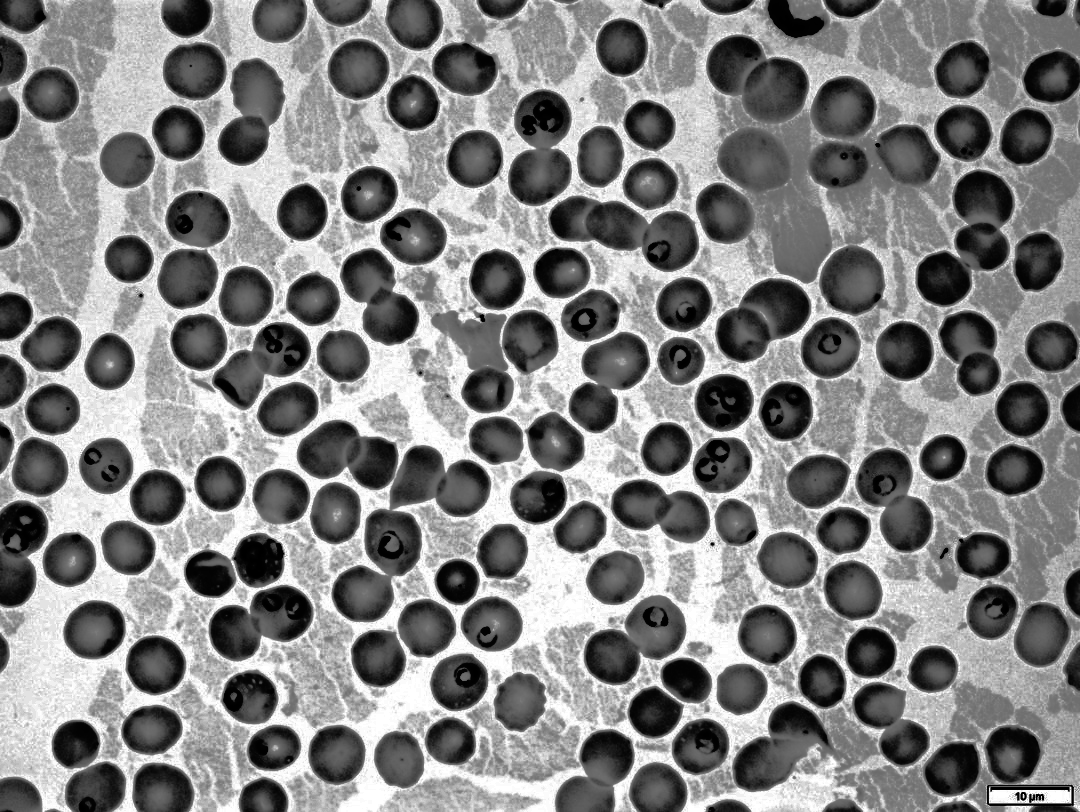

In [ ]:
#equalizing the image 
darker = cv2.equalizeHist(gray)
Image.fromarray(darker)

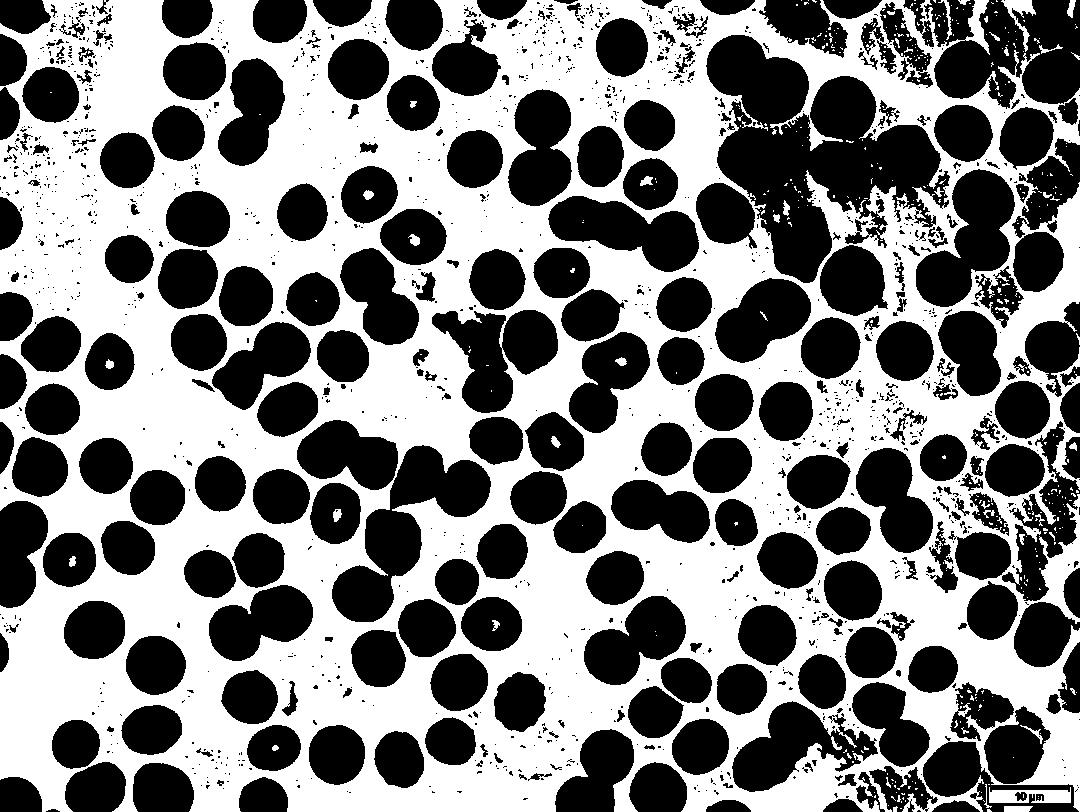

In [ ]:
#threshold
ret,thresh = cv2.threshold(darker,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
Image.fromarray(thresh)

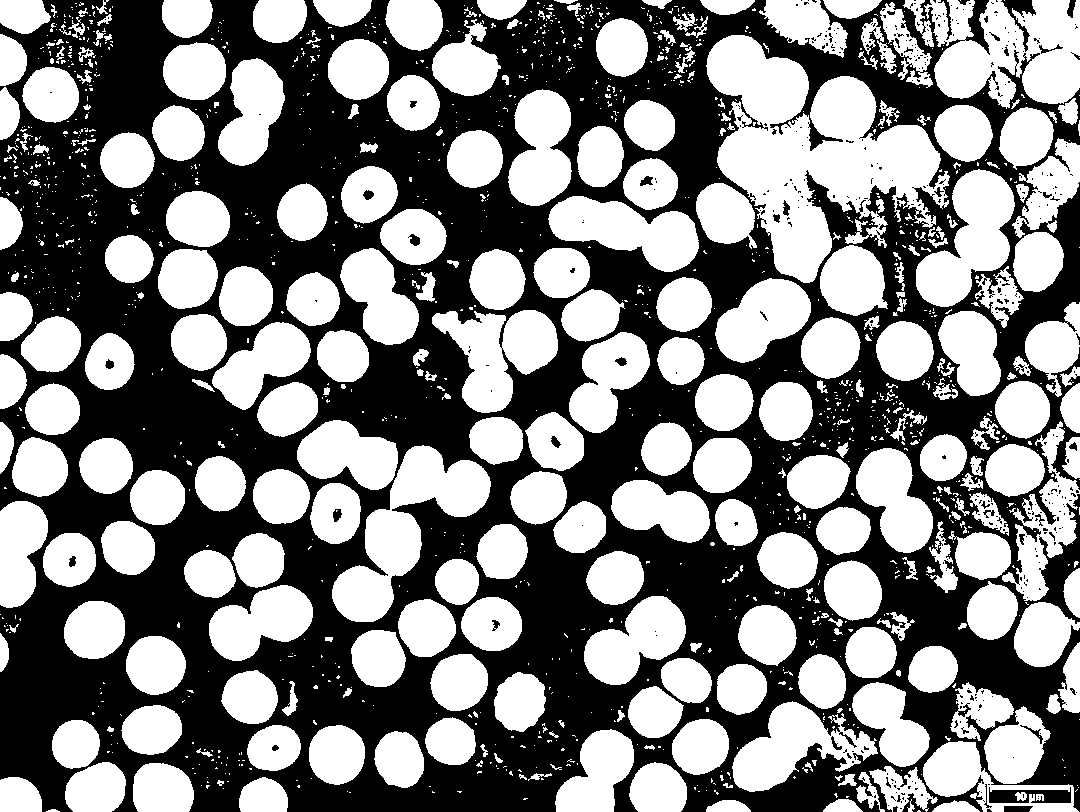

In [ ]:
#inversing the bits of the image 
newimg = cv2.bitwise_not(thresh)
Image.fromarray(newimg)

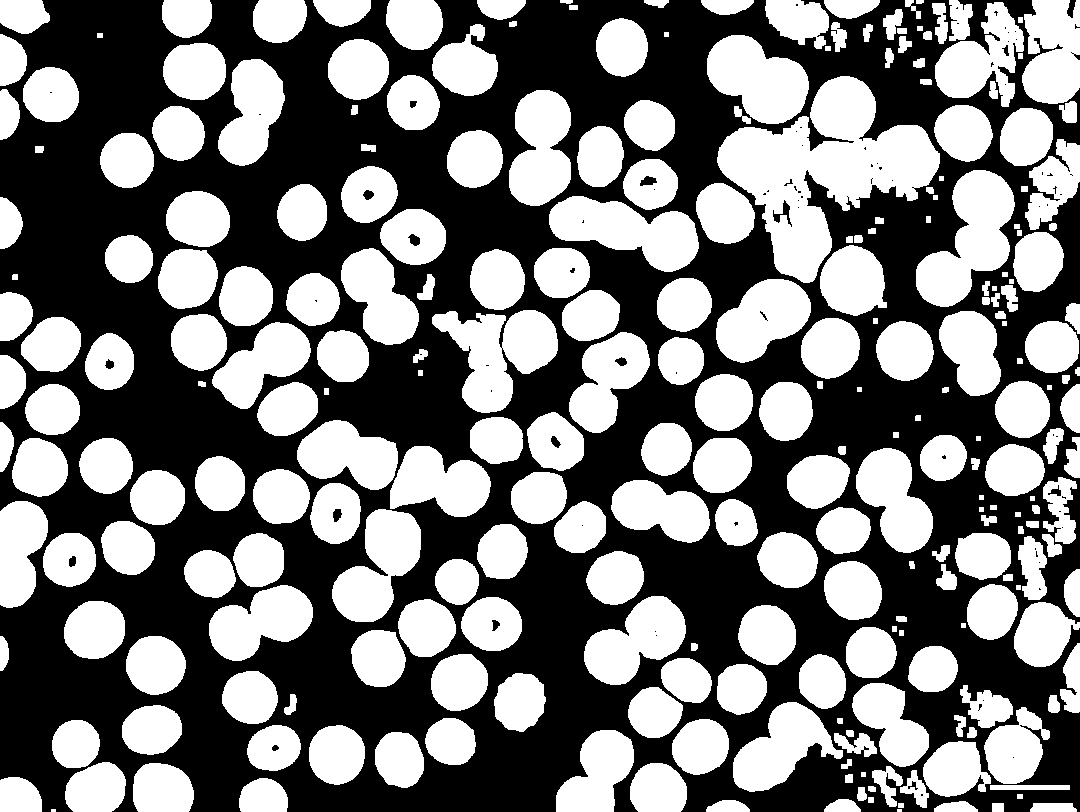

In [ ]:
# opening
kernel = np.ones((5,5),np.uint8)
opened = cv2.morphologyEx(newimg, cv2.MORPH_OPEN, kernel)
Image.fromarray(opened)

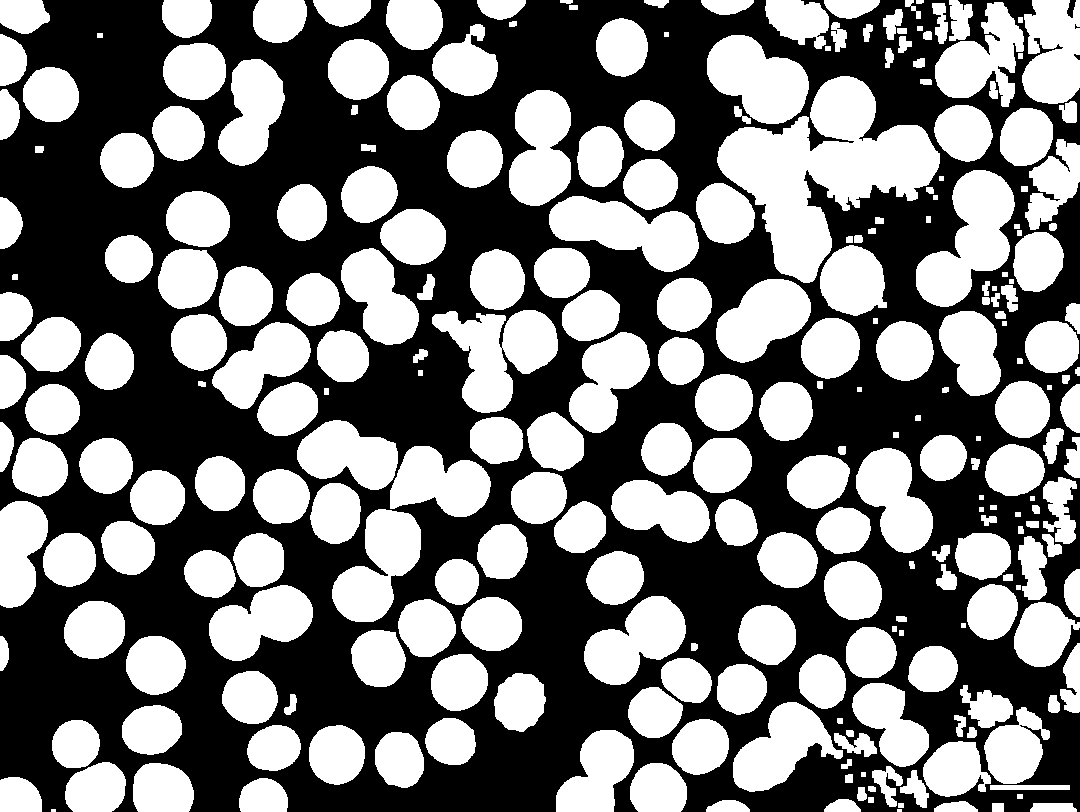

In [ ]:
#find contours of white objects
contours, hierarchy = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#filling the "holes" of the white objects (red blood cells). 
#This is needed for proper segmentation with the watershed algorithm
for cnt in contours:
    cv2.drawContours(opened,[cnt],0,255,-1)
Image.fromarray(opened)

In [ ]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(opened)
localMax = peak_local_max(D, indices=False, min_distance=15,
	labels=opened)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=opened)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 207 unique segments found


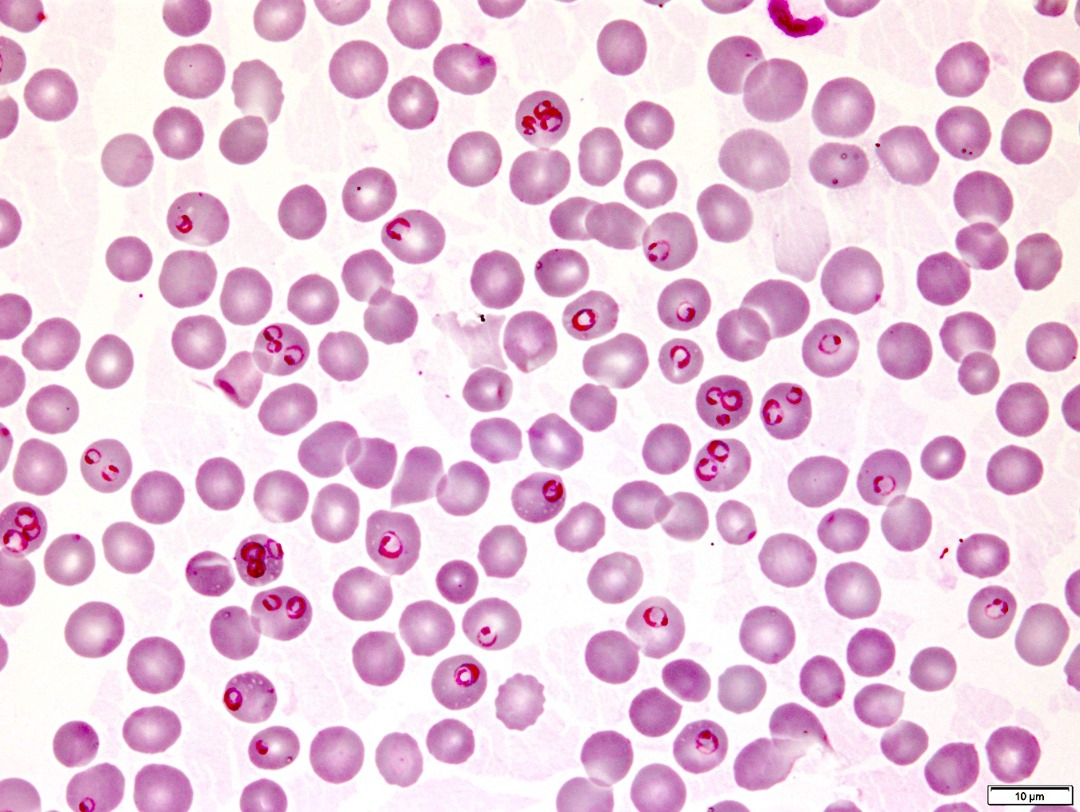

In [ ]:
from zipfile import ZipFile
zipObj = ZipFile('files.zip', 'w')
# loop over the unique labels returned by the Watershed
# algorithm
for i,label in enumerate(np.unique(labels)):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
 
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)[-2]
	c = max(cnts, key=cv2.contourArea)
	
	x,y,w,h = cv2.boundingRect(c)
	new_img=image[y:(y+h),x:(x+w)]
	cv2.imwrite(f"njj{i}.jpeg",new_img)
	myimg = cv2.imread(f'njj{i}.jpeg')
	cv2.imwrite(f"njj{i}.jpeg",myimg)
	zipObj.write(f'njj{i}.jpeg')
	
Image.fromarray(image)




In [ ]:
zipObj.close() 
#files.download('files.zip')

In [ ]:
  %matplotlib inline
import matplotlib.pylab as plt
plt.imshow(labels)